In [ ]:
print('Hello, World!')

Hello, World!


# 1. Installation
Terminal command for installing pytorch for GPU.

In [ ]:
! pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116


Import the required packages.

In [ ]:
import torch
import numpy as np
import random
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

Check if pytorch is utilizing the GPU.

In [ ]:
torch.cuda.is_available()

True

`torch.rand(m, n)` - Returns a $m \times n$ tensor filled with random numbers from a uniform distribution on the interval $[0, 1)$.

In [ ]:
x = torch.rand(5, 3)
print(x)

tensor([[0.8391, 0.8710, 0.4108],
        [0.1367, 0.7966, 0.5889],
        [0.1890, 0.5635, 0.9352],
        [0.6978, 0.6866, 0.9521],
        [0.0285, 0.7717, 0.3764]])


# 2. Tensor Basics

*   `torch.empty(size)` - Returns a tensor filled with uninitialized data. The shape of the tensor is defined by the variable argument `size`.
*   `torch.ones(size)` - Returns a tensor filled with the scalar value 1, with the shape defined by the variable argument `size`. 
*   `size (int...)` – a sequence of integers defining the shape of the output tensor. Can be a variable number of arguments or a collection like a list or tuple. 
*   `dtype (torch.dtype, optional)` – the desired data type of returned tensor. Default is `float32`.



In [ ]:
x1 = torch.empty(1)
print(x1)

x2 = torch.empty(2,2)
print(x2)

x3 = torch.ones(2,2)
print(x3)

x4 = torch.rand(2,2)
print(x4)

x5 = torch.ones(2,2, dtype=torch.int32)
print(x5, x5.dtype)

tensor([7.4651e-35])
tensor([[ 7.4667e-35,  0.0000e+00],
        [-2.0000e+00,  1.7640e+00]])
tensor([[1., 1.],
        [1., 1.]])
tensor([[0.5161, 0.3778],
        [0.1474, 0.1048]])
tensor([[1, 1],
        [1, 1]], dtype=torch.int32) torch.int32


Basic mathematical operations between tensors.

In [ ]:
x = torch.rand(2,2)
y = torch.rand(2,2)
print(x, y)

z1 = x + y
print(z1)

z2 = torch.add(x, y) # same as z = x + y
print(z2)

x.add_(y) # x += y
print(x)


z3 = x * y
print(z3)

z4 = torch.mul(x, y) # same as z = x * y
print(z4)

z5 = x / y
print(z5)

z6 = torch.div(x, y) # same as z = x / y
print(z6)

z7 = x - y
print(z7)

z8 = torch.sub(x, y) # same as z = x - y
print(z8)

tensor([[0.4255, 0.6686],
        [0.3715, 0.4163]]) tensor([[0.5311, 0.1669],
        [0.2869, 0.2304]])
tensor([[0.9566, 0.8355],
        [0.6584, 0.6466]])
tensor([[0.9566, 0.8355],
        [0.6584, 0.6466]])
tensor([[0.9566, 0.8355],
        [0.6584, 0.6466]])
tensor([[0.5081, 0.1394],
        [0.1889, 0.1490]])
tensor([[0.5081, 0.1394],
        [0.1889, 0.1490]])
tensor([[1.8011, 5.0057],
        [2.2949, 2.8070]])
tensor([[1.8011, 5.0057],
        [2.2949, 2.8070]])
tensor([[0.4255, 0.6686],
        [0.3715, 0.4163]])
tensor([[0.4255, 0.6686],
        [0.3715, 0.4163]])


Slicing a matrix along rows and columns.

In [ ]:
x = torch.rand(5, 3)
print(x)
print(x[:, 0]) # x[:, i] -> all rows of ith column
print(x[0, :]) # x[i, :] -> all columns of ith row
print(x[1, 1]) # x[i, j] -> element at ith row and jth column
print(x[1, 1].item()) # just get the value itself

tensor([[0.0785, 0.4065, 0.5383],
        [0.1682, 0.6793, 0.0947],
        [0.4998, 0.0489, 0.5228],
        [0.8323, 0.8792, 0.6739],
        [0.1683, 0.4357, 0.5308]])
tensor([0.0785, 0.1682, 0.4998, 0.8323, 0.1683])
tensor([0.0785, 0.4065, 0.5383])
tensor(0.6793)
0.6793379187583923


* `torch.randn(size)` - Returns a tensor filled with random numbers from a normal distribution with mean 0 and variance 1 (also called the standard normal distribution).
$Out_i \sim \mathcal{N}(0, 1)$

* `Tensor.view(*shape)` - Returns a new tensor with the same data as the `self` tensor but of a different `shape`. The returned tensor shares the same data and must have the same number of elements, but may have a different size. For a tensor to be viewed, the new view size must be compatible with its original size and stride.

In [ ]:
x = torch.randn(4, 4)
y = x.view(16)
z1 = x.view(-1, 8) # the size -1 is inferred from other dimensions
z2 = x.view(8, 2)
print(x, y, z1, z2)
print(x.size(), y.size(), z1.size(), z2.size())

tensor([[ 0.5247, -0.5801,  0.2874, -1.1761],
        [-0.0789, -0.1503, -0.5431,  0.5938],
        [ 0.0114, -0.6989,  0.2251,  0.7482],
        [-2.1660, -0.2883, -0.8345, -0.7719]]) tensor([ 0.5247, -0.5801,  0.2874, -1.1761, -0.0789, -0.1503, -0.5431,  0.5938,
         0.0114, -0.6989,  0.2251,  0.7482, -2.1660, -0.2883, -0.8345, -0.7719]) tensor([[ 0.5247, -0.5801,  0.2874, -1.1761, -0.0789, -0.1503, -0.5431,  0.5938],
        [ 0.0114, -0.6989,  0.2251,  0.7482, -2.1660, -0.2883, -0.8345, -0.7719]]) tensor([[ 0.5247, -0.5801],
        [ 0.2874, -1.1761],
        [-0.0789, -0.1503],
        [-0.5431,  0.5938],
        [ 0.0114, -0.6989],
        [ 0.2251,  0.7482],
        [-2.1660, -0.2883],
        [-0.8345, -0.7719]])
torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8]) torch.Size([8, 2])


* `torch.from_numpy(ndarray) → Tensor` - Creates a `Tensor` from a `numpy.ndarray`. Both torch tensor version and numpy array version will share same memory location. Modifications to the tensor will be reflected in the ndarray and vice versa. The returned tensor is not resizable.

* `.numpy()` - Converts a `tensor` object into an `numpy.ndarray` object.

In [ ]:
a =  torch.ones(5)
print(a)

a_np = a.numpy()
print(a_np)

a.add_(1) # a += 1
print(a, a_np)

b = np.ones(5)
print(b)
b_torch = torch.from_numpy(b)
print(b_torch)

b += 1
print(b, b_torch)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2.]) [2. 2. 2. 2. 2.]
[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.] tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


# 3. Gradient Calculation With Autograd

In [ ]:
x = torch.ones(5, requires_grad=True)
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


`torch.autograd` provides classes and functions implementing automatic differentiation of arbitrary scalar valued functions.

`requires_grad = True` - Tracks all operations on the tensor.

`backward()` - Computes the sum of gradients of given tensors with respect to graph leaves. If a Tensor is non-scalar (more than 1 element), we need to specify arguments for backward() that is a tensor of matching shape.

`grad` - Computes and returns the sum of gradients of outputs with respect to the inputs.

Uses vector Jacobian product, a.k.a. computing partial derivatives while applying the chain rule.

In [ ]:
y = x + 2
print(y)

z = 2 * y**2
print(z)

# z = z.mean()
# print(z)

v = torch.tensor([0.1, 1.0, 1.0, 0.001, 1.1], dtype=torch.float32)
# z.backward() # dz/dx
z.backward(v)
print(x.grad)

tensor([3., 3., 3., 3., 3.], grad_fn=<AddBackward0>)
tensor([18., 18., 18., 18., 18.], grad_fn=<MulBackward0>)
tensor([ 6.0000, 16.8000, 16.8000,  4.8120, 18.0000])


`torch.no_grad()` - Context-manager that disabled gradient calculation. Disabling gradient calculation is useful for inference, when we are sure that we will not call `Tensor.backward()`. It will reduce memory consumption for computations that would otherwise have `requires_grad=True`. In this mode, the result of every computation will have `requires_grad=False`, even when the inputs have `requires_grad=True`. This context manager is thread local; it will not affect computation in other threads.

In [ ]:
x = torch.ones(3, requires_grad=True)
print(x)
# x.requires_grad_(False)
# x_nograd = x.detach()
# print(x_nograd)

with torch.no_grad():
    y = x + 2
    print(y)

tensor([1., 1., 1.], requires_grad=True)
tensor([3., 3., 3.])


There are cases where it may be necessary to zero-out the gradients of a tensor, *e.g.* when we start our training loop.

In [ ]:
w = torch.ones(4, requires_grad=True)
for epoch in range(3):
    y = (w * 3).sum()
    y.backward()
    print(w.grad)
    w.grad.zero_() # empty gradients, otherwise the values will accumulate

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


# 4. Backpropagation

`torch.Tensor.backward()` - Computes the gradient of current tensor w.r.t. graph leaves. The graph is differentiated using the chain rule. If the tensor is non-scalar (i.e. its data has more than one element) and requires `gradient`, the function additionally requires specifying gradient. It should be a tensor of matching type and location, that contains the gradient of the differentiated function w.r.t. `self`.

In [ ]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

# forward pass to compute loss
y_hat = w * x
loss = (y_hat - y)**2
print(loss)

# backward pass to compute gradient dLoss/dw
loss.backward()
print(w.grad)

# update weights, this operation should not be part of the computational graph
with torch.no_grad():
    w -= 0.01 * w.grad
w.grad.zero_()

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


tensor(0.)

# 5. Gradient Descent with Autograd and Backpropagation

A manual implementation of Gradient Descent.
The function that we are trying to determine is a Linear function,
$$f(w, X) = w \cdot X$$
where, the value of $w$ should be 2.
The metric for loss is the Mean Squared Error (MSE) loss.
$$J = \frac{1}{N}\sum_i(w \cdot x_i - y_i)^2$$

The gradient w.r.t the loss is,
$$\frac{\partial J}{\partial w} = \frac{2}{N} \sum_i x_i (w \cdot x_i - y_i)$$

In [ ]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float32)
Y = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20], dtype=np.float32)

w = random.uniform(0, 10) # random initialization
# print(w)
def forward(x):
    return w * x

def loss(y, y_hat):
    return ((y_hat - y)**2).mean()

def gradient(x, y, y_hat):
    return ((2 * x) * (y_hat - y)).mean()

print(f'Prediction pre-training: f(5) = {forward(5)}')

lr = 0.01
i = 10

for epoch in range(i):
    Y_hat = forward(X)
    J = loss(Y, Y_hat)
    dw = gradient(X, Y, Y_hat)
    w -= lr * dw
    print(f'Epoch {epoch}: w = {w}, loss = {J}')

print(f'Prediction post-training: f(5) = {forward(5)}')

Prediction pre-training: f(5) = 9.4216768617723
Epoch 0: w = 1.9733971380252362, loss = 0.5150647759437561
Epoch 1: w = 1.9938813637752058, loss = 0.027246981859207153
Epoch 2: w = 1.9985926904339315, loss = 0.001441337401047349
Epoch 3: w = 1.9996762668896437, loss = 7.624272257089615e-05
Epoch 4: w = 1.999925597402823, loss = 4.036734480905579e-06
Epoch 5: w = 1.9999828750822664, loss = 2.1303458197508007e-07
Epoch 6: w = 1.9999960930082918, loss = 1.1345036909915507e-08
Epoch 7: w = 1.999999160263312, loss = 6.109601713433221e-10
Epoch 8: w = 1.9999997818205768, loss = 2.5131896563834744e-11
Epoch 9: w = 1.999999959680833, loss = 2.120259480140052e-12
Prediction post-training: f(5) = 9.999999798404165


The manually implemented gradient computation is replaced with `autograd`'s backward pass `backward`.

In [ ]:
X = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8, 10, 12, 14, 16, 18, 20], dtype=torch.float32)

w = torch.tensor(random.uniform(0, 10), dtype=torch.float32, requires_grad=True) # random initialization

def forward(x):
    return w * x

def loss(y, y_hat):
    return ((y_hat - y)**2).mean()

print(f'Prediction pre-training: f(5) = {forward(5)}')

lr = 0.01
i = 100

for epoch in range(i):
    Y_hat = forward(X)
    J = loss(Y, Y_hat)
    J.backward()
    with torch.no_grad():
        w -= lr * w.grad
    w.grad.zero_()
    if epoch % 10 == 0:
        print(f'Epoch {epoch}: w = {w.item()}, loss = {J.item()}')

print(f'Prediction post-training: f(5) = {forward(5).item()}')

Prediction pre-training: f(5) = 5.2617716789245605
Epoch 0: w = 1.7820414304733276, loss = 34.574241638183594
Epoch 10: w = 1.9999998807907104, loss = 7.685230056508896e-12
Epoch 20: w = 2.0, loss = 0.0
Epoch 30: w = 2.0, loss = 0.0
Epoch 40: w = 2.0, loss = 0.0
Epoch 50: w = 2.0, loss = 0.0
Epoch 60: w = 2.0, loss = 0.0
Epoch 70: w = 2.0, loss = 0.0
Epoch 80: w = 2.0, loss = 0.0
Epoch 90: w = 2.0, loss = 0.0
Prediction post-training: f(5) = 10.0


# 6. Training Pipeline: Model, Loss, and Optimizer

`torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)` - Applies a linear transformation to the incoming data: $$y = x W^T + b$$
* `in_features (int)` – size of each input sample
* `out_features (int)` – size of each output sample
* `bias (bool)` – If set to `False`, the layer will not learn an additive bias. Default: `True`

`weight (torch.Tensor)` – the learnable weights of the module of shape `(out_features,in_features)`. The values are initialized from $w \sim \mathcal{U}(-\sqrt k, \sqrt k)$, where, $k = \frac{1}{in\_features}$. The range is same for `bias`.

In [ ]:
X = torch.tensor([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8], [10], [12], [14], [16], [18], [20]], dtype=torch.float32)

# w = torch.tensor([random.uniform(0, 10)], dtype=torch.float32, requires_grad=True)

X_test = torch.tensor([69], dtype=torch.float32)

model = nn.Linear(X.shape[1], X.shape[1])

print(f'Prediction pre-training: f({X_test.item()}) = {model(X_test).item()}')

lr = 0.01
i = 500

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
# optimizer = torch.optim.Adam(model.parameters(), lr=lr)
# optimizer = torch.optim.Adagrad(model.parameters(), lr=lr)
for epoch in range(i):
    Y_hat = model(X)
    J = loss(Y, Y_hat)
    J.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f'Epoch {epoch}: w = {w[0][0].item()}, b = {b.item()}, loss = {J.item()}')

print(f'Prediction post-training: f({X_test.item()}) = {model(X_test).item()}')

Prediction pre-training: f(69.0) = 55.469512939453125
Epoch 0: w = 1.6658542156219482, b = 0.6429587006568909, loss = 49.150882720947266
Epoch 10: w = 1.9067645072937012, b = 0.6490885615348816, loss = 0.09105506539344788
Epoch 20: w = 1.910606861114502, b = 0.6223392486572266, loss = 0.08370493352413177
Epoch 30: w = 1.9142907857894897, b = 0.5966922640800476, loss = 0.07694792747497559
Epoch 40: w = 1.9178229570388794, b = 0.5721022486686707, loss = 0.07073663920164108
Epoch 50: w = 1.9212095737457275, b = 0.5485256314277649, loss = 0.06502646207809448
Epoch 60: w = 1.9244564771652222, b = 0.5259206295013428, loss = 0.05977732688188553
Epoch 70: w = 1.9275696277618408, b = 0.5042470693588257, loss = 0.05495183914899826
Epoch 80: w = 1.9305545091629028, b = 0.483466774225235, loss = 0.0505160391330719
Epoch 90: w = 1.933416485786438, b = 0.4635428488254547, loss = 0.04643832892179489
Epoch 100: w = 1.9361604452133179, b = 0.44443994760513306, loss = 0.042689695954322815
Epoch 110: w =

# 7. Linear Regression
`sklearn.datasets.make_regression` - Generate a random regression problem. The input set can either be well conditioned (by default) or have a low rank-fat tail singular profile. `noise` is the standard deviation of the Gaussian noise applied to the output.

`torch.optim.SGD` - Implements stochastic gradient descent (optionally with momentum).

In [ ]:
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))
Y = Y.view(Y.shape[0], 1) # reshape row vector to column vector

model = nn.Linear(X.shape[1], X.shape[0])

lr = 0.01
i = 27000

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for epoch in range(i):
    Y_hat = model(X)
    J = loss(Y, Y_hat)
    J.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 1000 == 0:
        [w, b] = model.parameters()
        print(f'Epoch {epoch}: loss = {J.item()}')

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([100, 100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0: loss = 2137.387451171875
Epoch 1000: loss = 1623.661865234375
Epoch 2000: loss = 1256.07861328125
Epoch 3000: loss = 992.5604248046875
Epoch 4000: loss = 803.3068237304688
Epoch 5000: loss = 667.161376953125
Epoch 6000: loss = 569.0682983398438
Epoch 7000: loss = 498.28985595703125
Epoch 8000: loss = 447.1520080566406
Epoch 9000: loss = 410.1590881347656
Epoch 10000: loss = 383.36822509765625
Epoch 11000: loss = 363.94573974609375
Epoch 12000: loss = 349.8515930175781
Epoch 13000: loss = 339.6151428222656
Epoch 14000: loss = 332.1745910644531
Epoch 15000: loss = 326.7623596191406
Epoch 16000: loss = 322.82293701171875
Epoch 17000: loss = 319.9538269042969
Epoch 18000: loss = 317.863037109375
Epoch 19000: loss = 316.3387451171875
Epoch 20000: loss = 315.2269592285156
Epoch 21000: loss = 314.41571044921875
Epoch 22000: loss = 313.8235168457031
Epoch 23000: loss = 313.39111328125
Epoch 24000: loss = 313.07525634765625
Epoch 25000: loss = 312.8445129394531
Epoch 26000: loss = 312.

`Tensor.detach()` - Returns a new Tensor, detached from the current computational graph. The result will never require gradient.

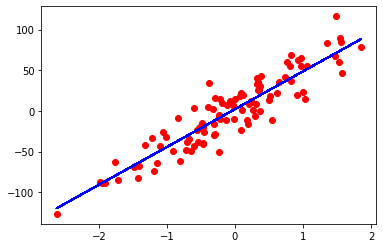

In [ ]:
predicted = model(X).detach().numpy()

plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

# 8. Logistic Regression
`sklearn.datasets.load_breast_cancer` - Load and return the UCI ML Breast Cancer Wisconsin (Diagnostic) dataset (classification).
`sklearn.preprocessing.StandardScaler` - Standardize features by removing the mean and scaling to unit variance.
The standard score of a sample x is calculated as:
$$z = \frac{x-\mu}{\sigma}$$ where, where $\mu$ is the mean and $\sigma$ is the variance of the training samples. Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with $\mu = 0$ and $\sigma = 1$).

* `fit_transform` - Fit to data, then transform it.
* `transform` - Perform standardization by centering and scaling.

`super(class_name, self)` - function which allows us to access temporary object of the super class.

`torch.sigmoid` - Computes the expit (also known as the logistic sigmoid function) of the elements of input.
$$ \sigma(x) = \frac{1}{1+e^{-x}} $$

`torch.round(input)` - Rounds elements of `input` to the nearest integer. This function implements the “round half to even” to break ties when a number is equidistant from two integers.

In [ ]:
data = datasets.load_breast_cancer()
X, Y = data.data, data.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# scale so that mean = 0 and variance = 1
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train_tensor = torch.from_numpy(X_train.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))
Y_train_tensor = torch.from_numpy(Y_train.astype(np.float32))
Y_test_tensor = torch.from_numpy(Y_test.astype(np.float32))

Y_train_tensor = Y_train_tensor.view(Y_train_tensor.shape[0], 1)
Y_test_tensor = Y_test_tensor.view(Y_test_tensor.shape[0], 1)

class LogisticRegression(nn.Module):
    def __init__(self, n_features):
        super(LogisticRegression, self).__init__() # super constructor
        self.linear = nn.Linear(n_features, 1)

    def forward(self, x):
        y_hat = torch.sigmoid(self.linear(x))
        return y_hat

model = LogisticRegression(X.shape[1])

lr = 0.01
i = 31000

loss = nn.BCELoss() # shows nan with Binary Cross Entropy loss (nn.BCELoss()), if (Y_hat, Y_train_tensor) serial not maintained
# loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for epoch in range(i):
    Y_hat = model(X_train_tensor)
    J = loss(Y_hat, Y_train_tensor)
    J.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 1000 == 0:
        [w, b] = model.parameters()
        print(f'Epoch {epoch}: loss = {J.item()}')

with torch.no_grad():
    Y_hat = model(X_test_tensor)
    print(f'Predicted classes: {Y_hat.round().view(1,-1)}')
    print(f'Actual classes: {Y_test_tensor.view(1,-1)}')
    accuracy = Y_hat.round().eq(Y_test_tensor).sum() / float(Y_test_tensor.shape[0])
    print(f'Accuracy: {accuracy.item() * 100}%')

Epoch 0: loss = 0.8484773635864258
Epoch 1000: loss = 0.10528001934289932
Epoch 2000: loss = 0.08590676635503769
Epoch 3000: loss = 0.07753192633390427
Epoch 4000: loss = 0.07255382835865021
Epoch 5000: loss = 0.06913077086210251
Epoch 6000: loss = 0.06657207012176514
Epoch 7000: loss = 0.06455431878566742
Epoch 8000: loss = 0.06290357559919357
Epoch 9000: loss = 0.06151673570275307
Epoch 10000: loss = 0.060328226536512375
Epoch 11000: loss = 0.05929381027817726
Epoch 12000: loss = 0.05838232859969139
Epoch 13000: loss = 0.057571135461330414
Epoch 14000: loss = 0.05684318020939827
Epoch 15000: loss = 0.05618511512875557
Epoch 16000: loss = 0.055586591362953186
Epoch 17000: loss = 0.05503927543759346
Epoch 18000: loss = 0.05453627556562424
Epoch 19000: loss = 0.05407189205288887
Epoch 20000: loss = 0.05364137142896652
Epoch 21000: loss = 0.05324067920446396
Epoch 22000: loss = 0.052866559475660324
Epoch 23000: loss = 0.05251595377922058
Epoch 24000: loss = 0.05218644067645073
Epoch 2500

In [ ]:
print(X.shape, Y.shape)

(569, 30) (569,)


In [ ]:
CM = confusion_matrix(Y_test_tensor.round(), Y_hat.round(),labels=[0.,1.])
print(CM)

[[42  1]
 [ 1 70]]


* 0 -> 'malignant'
* 1 -> 'benign'

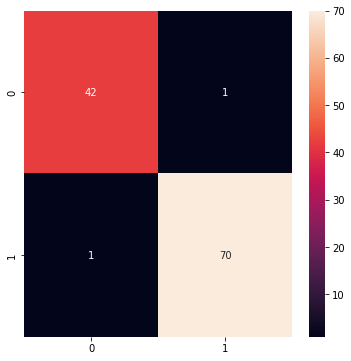

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(CM,annot=True)

In [ ]:
report = classification_report(Y_test_tensor.round(), Y_hat.round(), output_dict=True)
df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
0.0,0.976744,0.976744,0.976744,43.000000
1.0,0.985915,0.985915,0.985915,71.000000
accuracy,0.982456,0.982456,0.982456,0.982456
macro avg,0.981330,0.981330,0.981330,114.000000
weighted avg,0.982456,0.982456,0.982456,114.000000
